In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import patterns_analysis as pa
%load_ext autoreload
%autoreload 2

## How K_ac patterns affects population structure

### Produce dataframe of model dynamics with different patterned matrices

In [2]:
sizes = 4
num = 500
lower, upper = 0.001, 0.01
patterns = ['null', 'ident', 'naive', 'immune', 
            'barbell', 'cycle', 'complete', 'star']
end_time = 200

results = pa.analyze(sizes,
                     num,
                     lower,
                     upper,
                     patterns,
                     end_time)
print(results.shape)
results.to_csv('../Data/pattern_analysis.tsv', sep='\t', index=False)
results.head()

pattern:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

init:   0%|          | 0/500 [00:00<?, ?it/s]

(4000, 8)


,total,growth_rate,has_grown,euclidian,shannon_index,bray_curtis,init,pattern
0,0.040000,0.005337,1.0,0.011781,0.000000e+00,2.220446e-16,0,null
1,0.040000,0.002049,1.0,0.006351,0.000000e+00,2.220446e-16,1,null
2,0.040001,0.001668,1.0,0.005457,-2.220446e-16,4.440892e-16,2,null
3,0.039999,0.002858,1.0,0.008576,0.000000e+00,2.220446e-16,3,null
4,0.040000,0.003403,1.0,0.009519,4.440892e-16,0.000000e+00,4,null


In [5]:
df = pd.read_csv('../Data/pattern_analysis.tsv', sep='\t',
                 dtype={'pattern': 'string'},
                 keep_default_na=False)
#for pattern in patterns:
#    print(df[df['pattern'] == pattern].describe())
ids = ['init', 'pattern']
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,pattern,statistic,value
0,0,null,total,0.040000
1,1,null,total,0.040000
2,2,null,total,0.040001
3,3,null,total,0.039999
4,4,null,total,0.040000


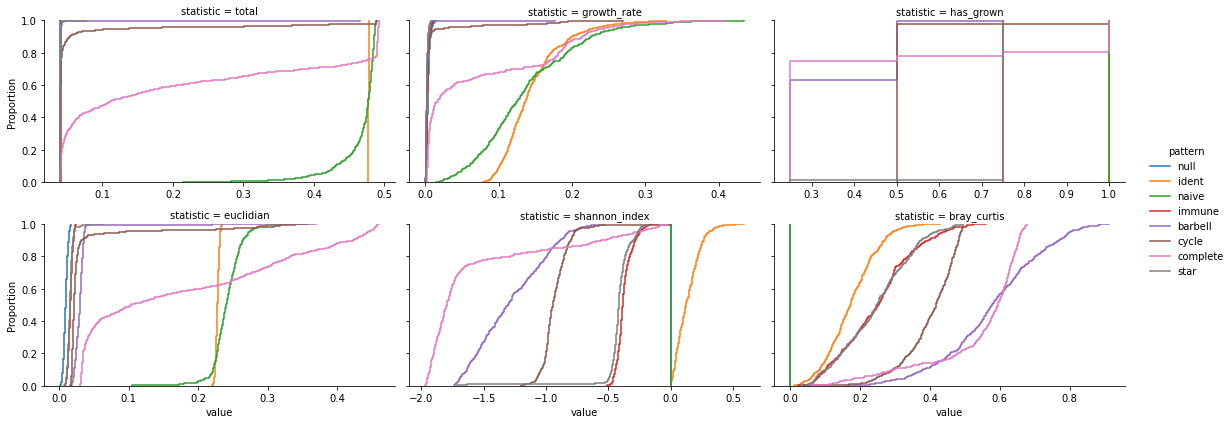

In [7]:
import seaborn as sns
plot = sns.FacetGrid(df, col='statistic', hue='pattern', col_wrap=3, 
                     aspect=16/9, sharex=False, sharey=True)
plot.map_dataframe(sns.ecdfplot, x='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/pattern_analysis.png')